In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
df=pd.read_csv('HR_comma_sep.csv')


df.head(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Number of Staff that have Left')

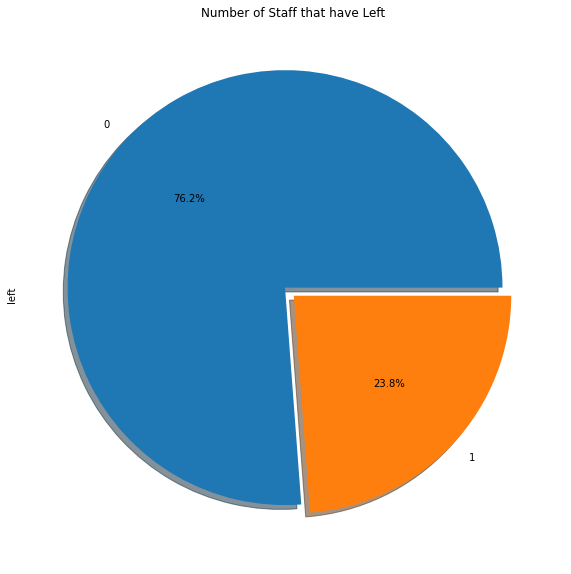

In [10]:
df['left'].value_counts().plot.pie(figsize=(19,10),autopct='%1.1f%%',explode=(0.05,0.005),shadow=True).set_title('Number of Staff that have Left')

Text(0.5, 1.0, 'The Level Satisfaction Evaluation')

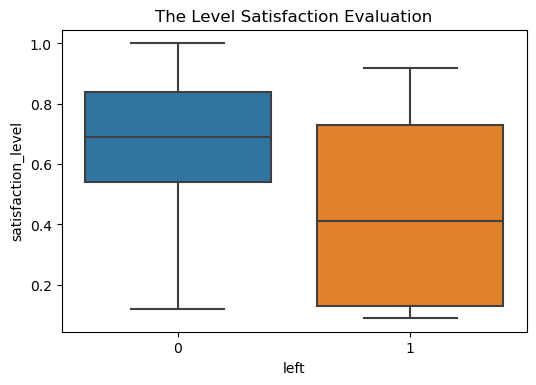

In [11]:
plt.figure(dpi=100)
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.title('The Level Satisfaction Evaluation')

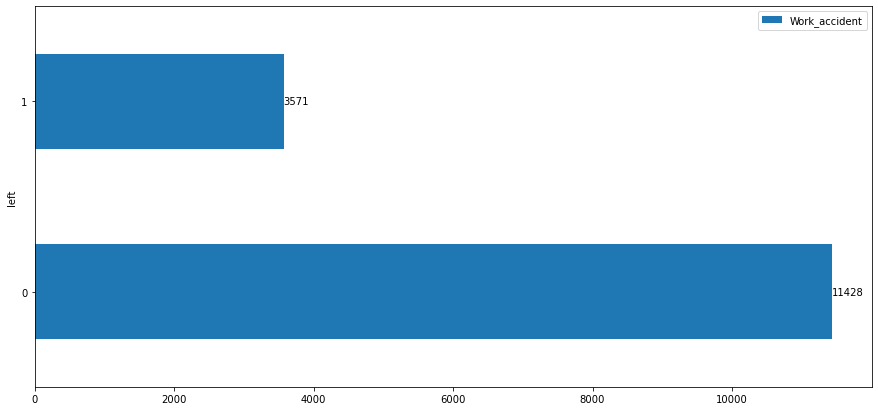

In [18]:
xyz=[]
abc=[]
for a,b in Counter(df['Work_accident']).items():
    xyz.append(a)
    abc.append(b)
    
df_plot=pd.DataFrame(list(zip(xyz,abc)),columns=['left','Work_accident'])
ax=df[['Work_accident','left']].groupby('left').count().plot.barh(figsize=(15,7))
plt.bar_label(ax.containers[0]);

In [23]:
for i in df.columns:
    print(df[i].unique())

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
[2 5 7 6 4 3]
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 2

array([<AxesSubplot:ylabel='promotion_last_5years'>], dtype=object)

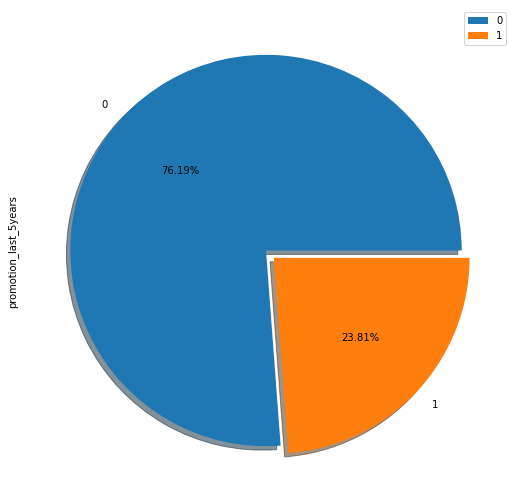

In [33]:
df[['left','promotion_last_5years']].groupby('left').count().plot.pie(figsize=(20,9),autopct='%1.2f%%',explode=(0.005,0.05),shadow=True,subplots=True)

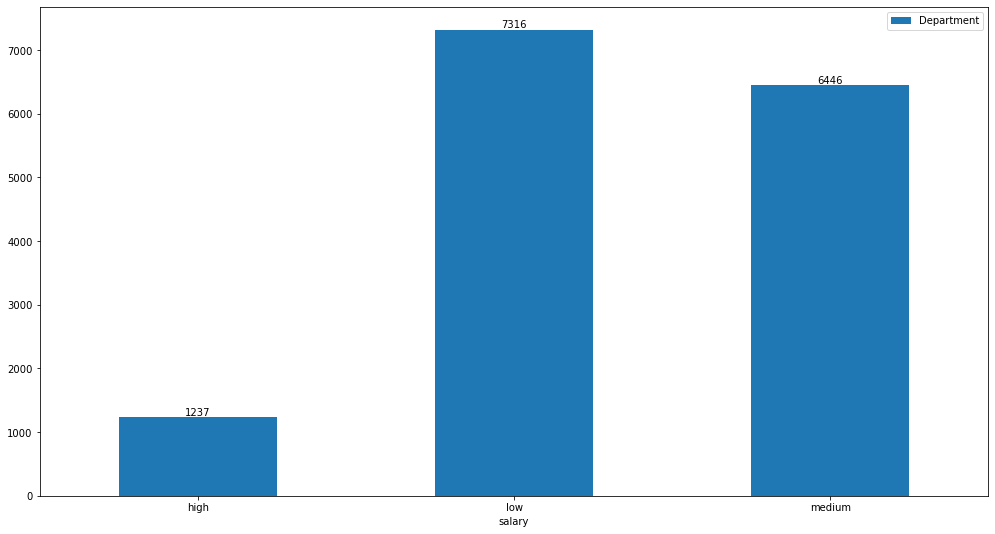

In [38]:
father=[]
mother=[]
for a,b in Counter(df['Department']).items():
    father.append(a)
    mother.append(b)
    
plt_df=pd.DataFrame(list(zip(father,mother)),columns=['Department','salary'])
ax=df[['Department','salary']].groupby('salary').count().plot.bar(figsize=(17,9))
plt.bar_label(ax.containers[0]);
plt.xticks(rotation=0);

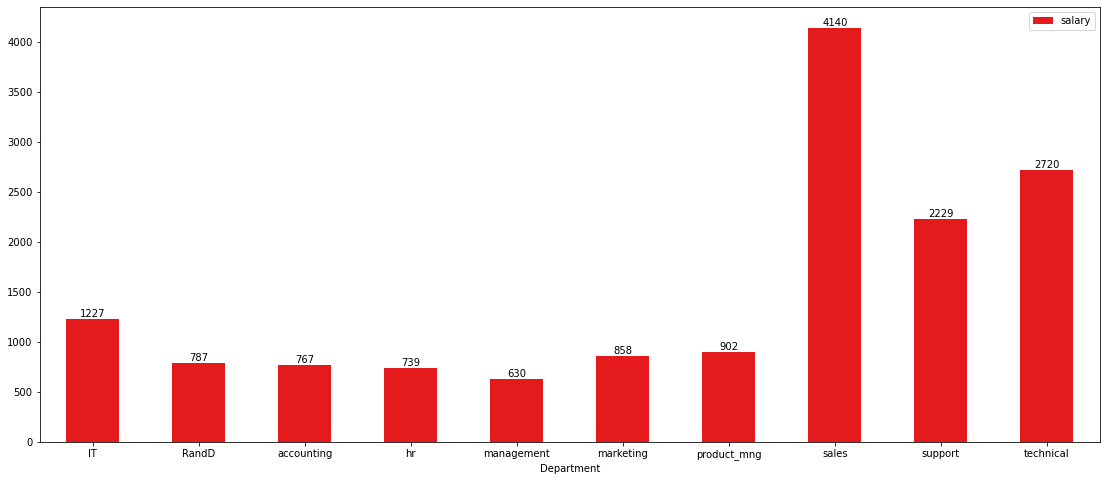

In [42]:
daddy=[]
mummy=[]
for x,y in Counter(df['salary']).items():
    daddy.append(x)
    mummy.append(y)
        
plt_df=pd.DataFrame(list(zip(daddy,mummy)),columns=['salary','Department'])
ax=df[['Department','salary']].groupby('Department').count().plot.bar(figsize=(19,8),cmap='Set1')
plt.bar_label(ax.containers[0]);
plt.xticks(rotation=0);

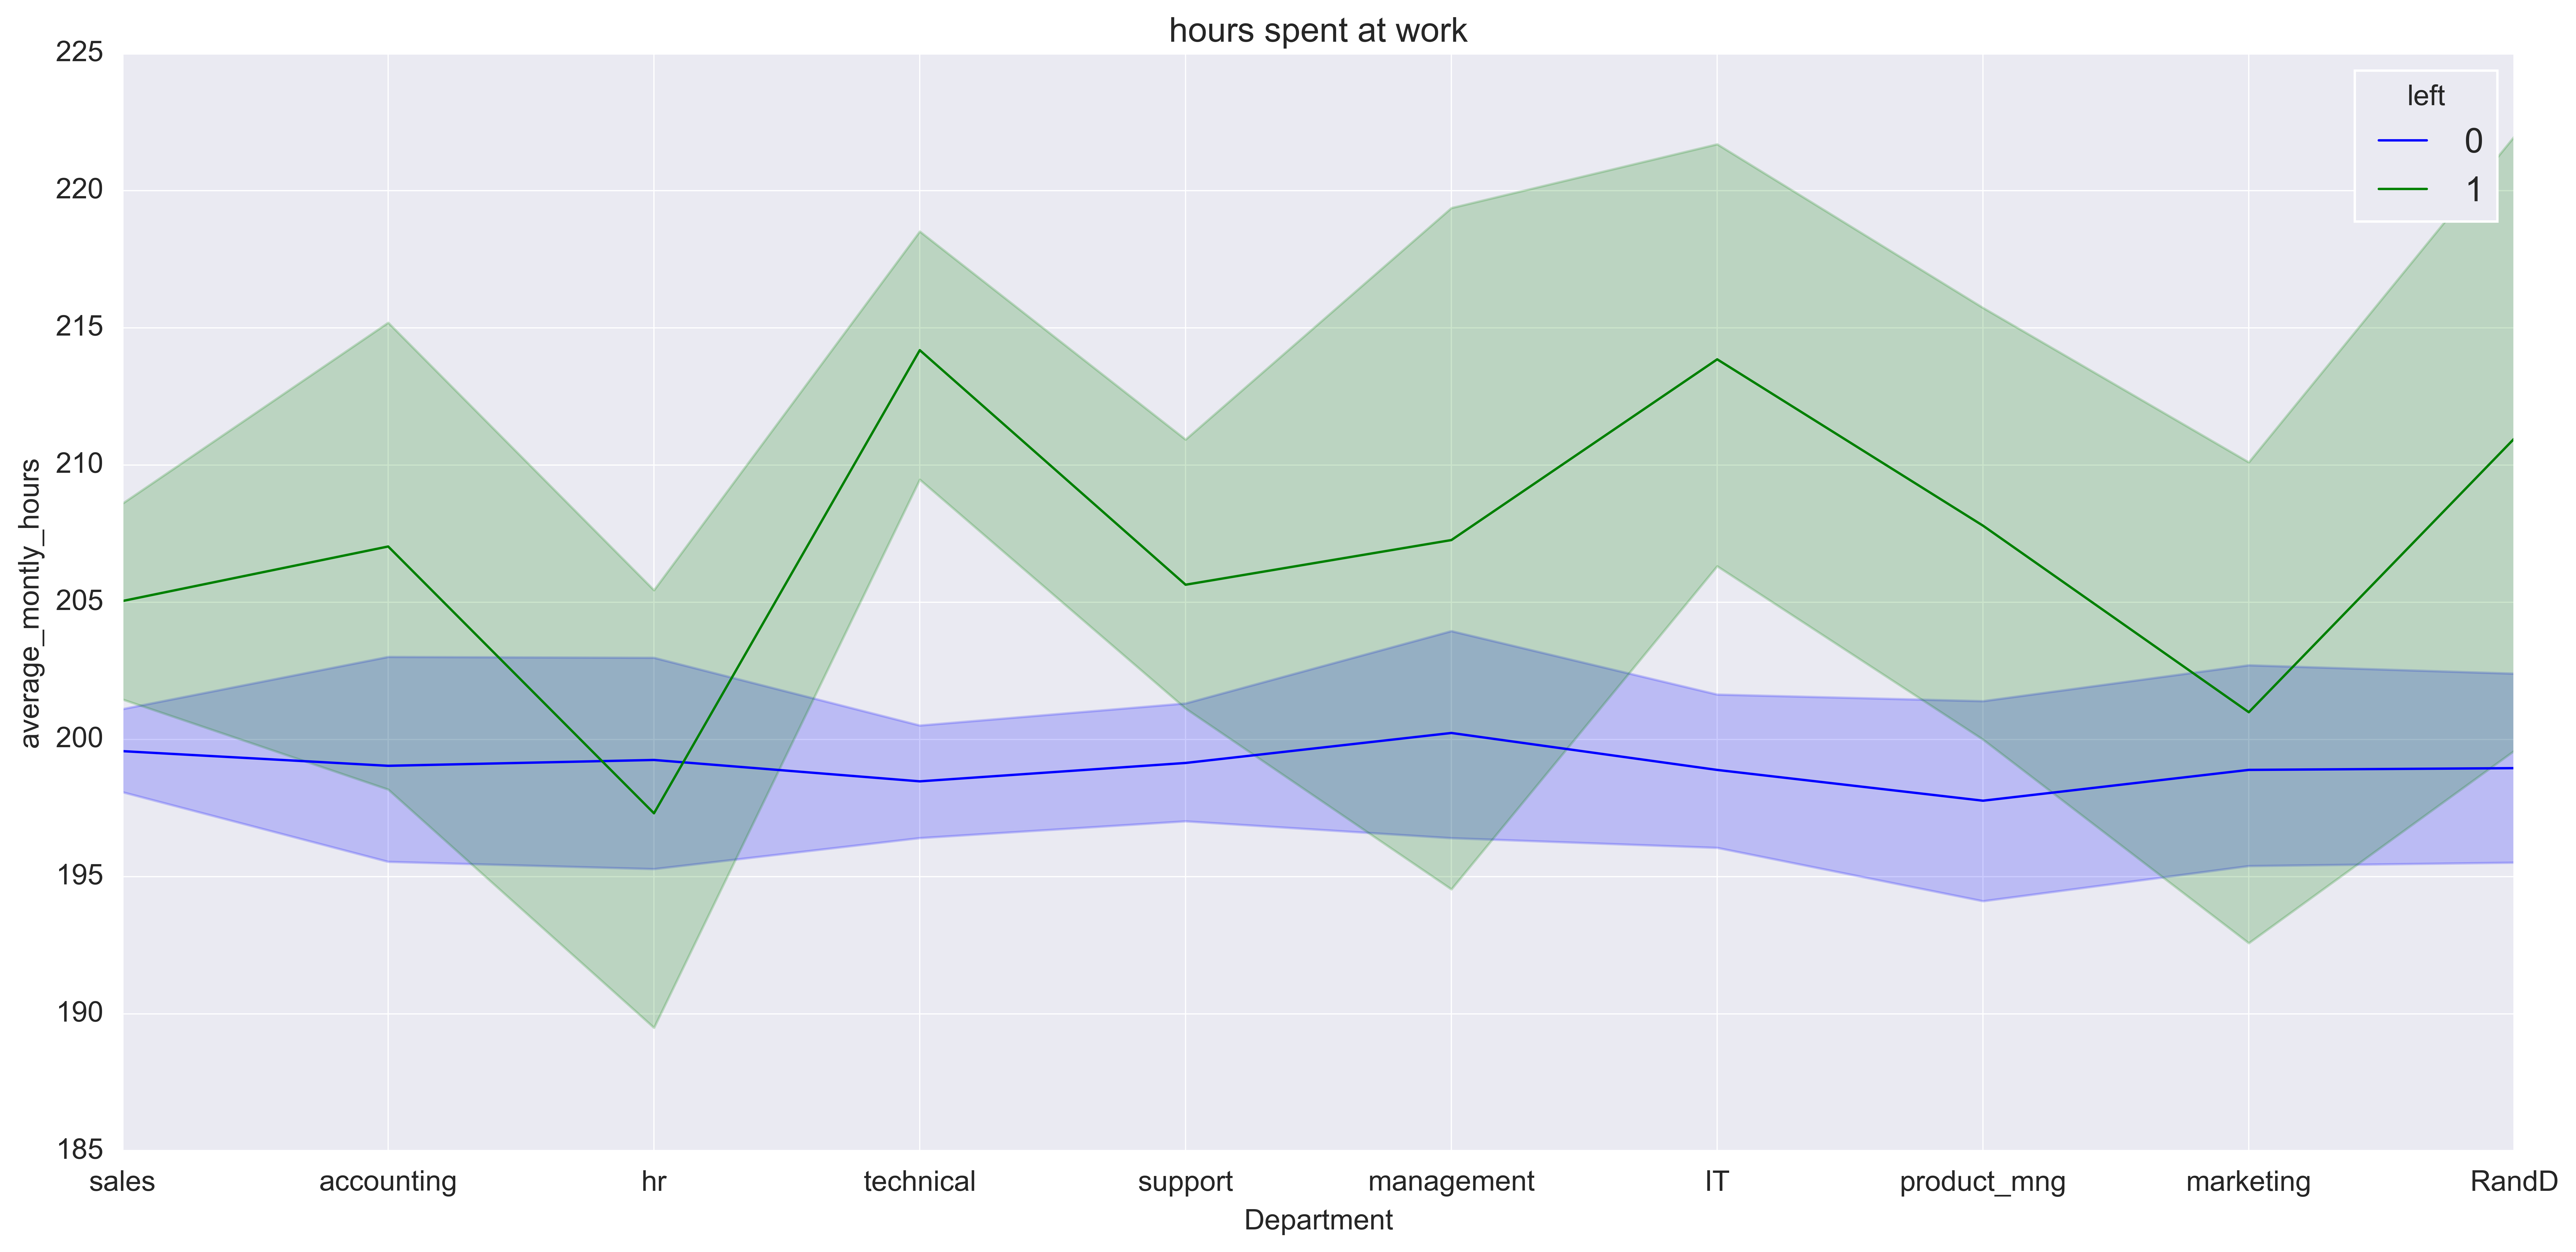

In [58]:
hrs=[]
spent=[]
for t,y in Counter(df['average_montly_hours']).items():
    hrs.append(t)
    spent.append(y)
plt.figure(figsize=(18,8),dpi=600)
sns.set_style('darkgrid')
plot_df=pd.DataFrame(list(zip(hrs,spent)),columns=['average_montly_hours','Department'])
sns.lineplot(data=df,y='average_montly_hours',x='Department',hue='left')
plt.title('hours spent at work');
plt.show();

In [59]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import  train_test_split

In [66]:
X=df.drop(columns=['left','Department','salary'],axis='columns')

y=df['left']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [68]:
model=LogisticRegressionCV()

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()

In [72]:
scalerXtrain=scaler.fit_transform(X_train)

In [73]:
scalerXtest=scaler.transform(X_test)

In [75]:
model.fit(scalerXtrain,y_train)

LogisticRegressionCV()

In [77]:
coef=model.coef_

coef

array([[-0.89484489,  0.0751995 , -0.27720844,  0.17005211,  0.29558577,
        -0.41710962, -0.17498597]])

In [78]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [79]:
coefs=pd.Series(index=X.columns,data=model.coef_[0])

<AxesSubplot:>

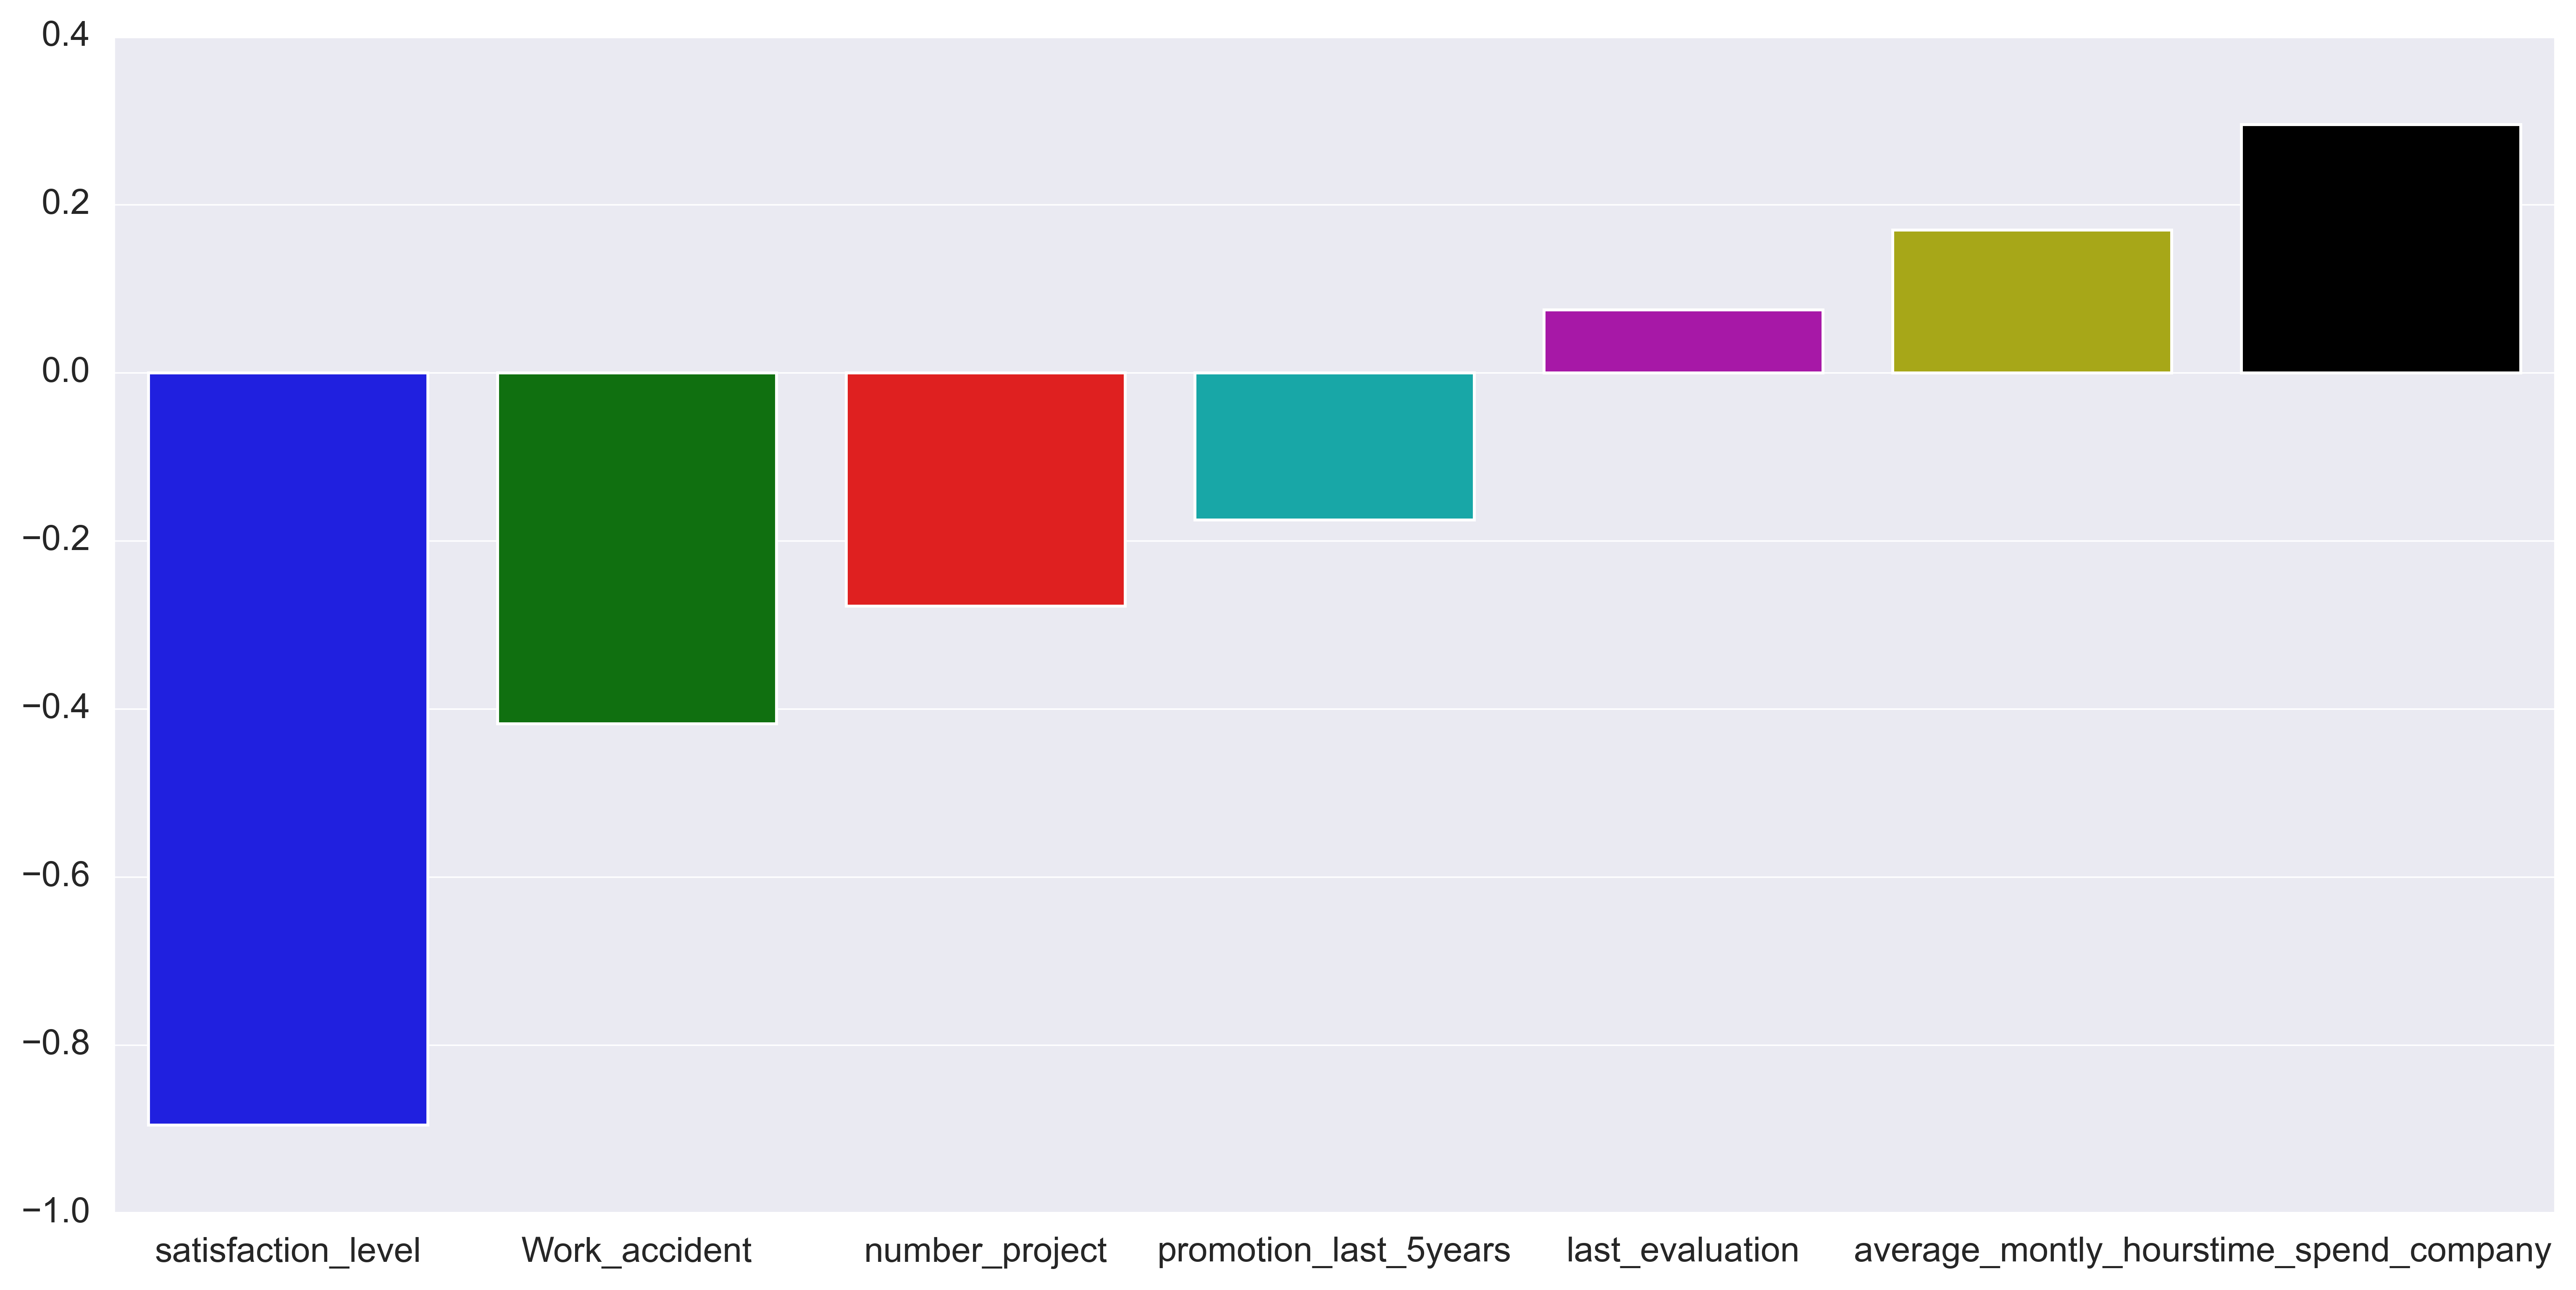

In [83]:
plt.figure(figsize=(15,7),dpi=500)
coefs=coefs.sort_values()
sns.barplot(x=coefs.index,y=coefs.values)

In [84]:
test_prediction=model.predict(scalerXtest)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_precision_recall_curve,plot_roc_curve,plot_confusion_matrix,classification_report

In [86]:
accuracy_score(y_test,test_prediction)

0.7672727272727272

In [87]:
confusion_matrix(y_test,test_prediction)

array([[3519,  251],
       [ 901,  279]], dtype=int64)

In [89]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3770
           1       0.53      0.24      0.33      1180

    accuracy                           0.77      4950
   macro avg       0.66      0.58      0.59      4950
weighted avg       0.73      0.77      0.73      4950



In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn=KNeighborsClassifier(n_neighbors=5)

In [92]:
knnx=knn.fit(scalerXtrain,y_train)

In [93]:
test_predict=knn.predict(scalerXtest)

In [94]:
accuracy_score(y_test,test_predict)

0.9632323232323232

In [96]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3770
           1       0.93      0.92      0.92      1180

    accuracy                           0.96      4950
   macro avg       0.95      0.95      0.95      4950
weighted avg       0.96      0.96      0.96      4950



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


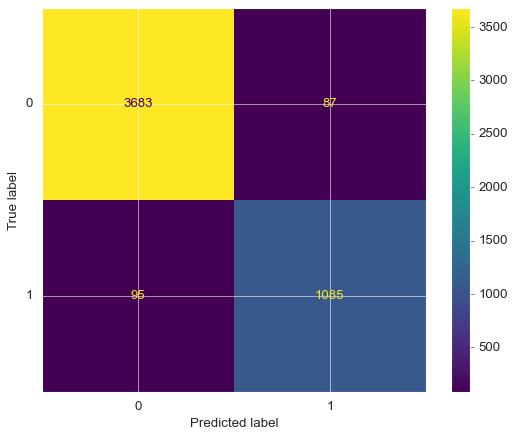

In [101]:
plot_confusion_matrix(knn,scalerXtest,y_test);

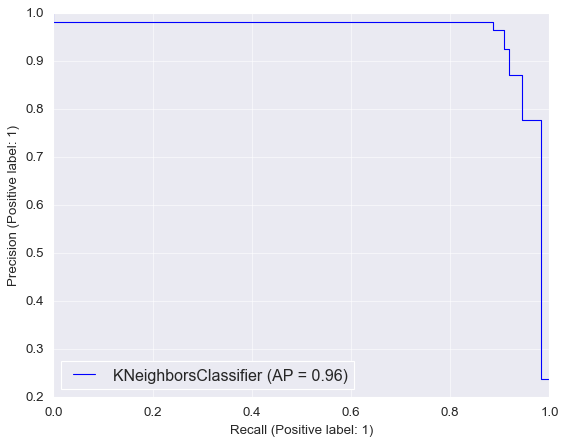

In [103]:
plot_precision_recall_curve(knn,scalerXtest,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


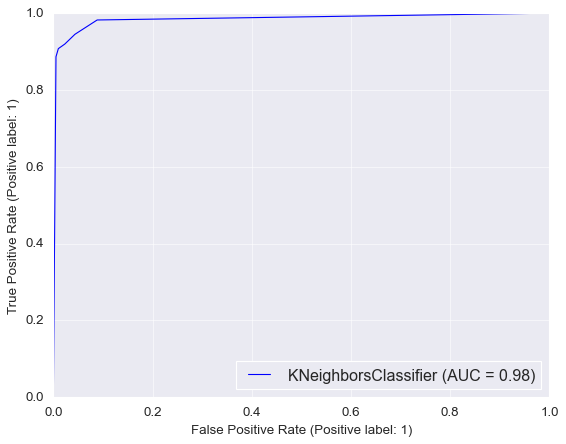

In [104]:
plot_roc_curve(knn,scalerXtest,y_test)

In [105]:
new_employee=[[0.50,0.60,1,272,2,1,1]]

In [106]:
knn.predict(new_employee)

array([1], dtype=int64)

In [107]:
knn.predict_proba(new_employee)

array([[0., 1.]])